In [1]:
import pandas
import datetime
import math
import os
import numpy
from scipy import signal, ndimage
from davitpy.models import *
from davitpy import utils
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
import seaborn as sns
from davitpy.pydarn.radar import *
from davitpy.pydarn.plotting import *
from davitpy.utils import *
%matplotlib inline

In [2]:
selDT = datetime.datetime( 2014, 3, 10, 3, 0 )#datetime.datetime( 2013, 3, 2, 1, 30 )
# poesFile = "/home/bharat/Documents/data/poes-old-data/poes-fit-20130302.txt"
poesFile = "/home/bharat/Documents/data/poes-new-fits/poes-fit-20140310.txt"

In [3]:
def convert_to_datetime(row):
    currDateStr = str( int( row["dateStr"] ) )
#     return currDateStr
    if row["timeStr"] < 10:
        currTimeStr = "000" + str( int( row["timeStr"] ) )
    elif row["timeStr"] < 100:
        currTimeStr = "00" + str( int( row["timeStr"] ) )
    elif row["timeStr"] < 1000:
        currTimeStr = "0" + str( int( row["timeStr"] ) )
    else:
        currTimeStr = str( int( row["timeStr"] ) )
    return datetime.datetime.strptime( currDateStr\
                    + ":" + currTimeStr, "%Y%m%d:%H%M" )

if "new" in poesFile:
    poesDF = pandas.read_csv( poesFile, header=None, sep=' ',\
                names=[ "MLAT", "MLON", "dateStr", "timeStr" ] )
else:
    poesDF = pandas.read_csv( poesFile, delim_whitespace=True, header=None,\
                names=[ "dateStr", "timeStr", "MLAT", "MLON" ] )
poesDF["date"] = poesDF.apply( convert_to_datetime, axis=1 )
poesDF.head()

,MLAT,MLON,dateStr,timeStr,date
0,230.5,0.0,20140310,30,2014-03-10 00:30:00
1,235.9,15.0,20140310,30,2014-03-10 00:30:00
2,235.5,30.0,20140310,30,2014-03-10 00:30:00
3,229.3,45.0,20140310,30,2014-03-10 00:30:00
4,217.7,60.0,20140310,30,2014-03-10 00:30:00


In [4]:
poesDF = poesDF[ poesDF["date"] \
            == selDT ].reset_index(drop=True)
if "old" in poesFile:
    zeroMlon = poesDF[ poesDF["MLAT"] == 0. ]["MLON"].values.tolist()
    mlatNonZeroVal = poesDF[ (poesDF["MLON"] == zeroMlon[0]) &\
                      (poesDF["MLAT"] >= 45.) ]["MLAT"].values.tolist()
    # SELECT INDEX
    selInd = poesDF[ (poesDF["MLON"] == zeroMlon[0]) &\
                      (poesDF["MLAT"] < 45.) ].index
    poesDF["MLAT"][selInd[0]] = mlatNonZeroVal[0]
poesDF

,MLAT,MLON,dateStr,timeStr,date
0,66.2,0.0,20140310,300,2014-03-10 03:00:00
1,66.6,15.0,20140310,300,2014-03-10 03:00:00
2,67.0,30.0,20140310,300,2014-03-10 03:00:00
3,67.2,45.0,20140310,300,2014-03-10 03:00:00
4,67.4,60.0,20140310,300,2014-03-10 03:00:00
5,67.5,75.0,20140310,300,2014-03-10 03:00:00
6,67.5,90.0,20140310,300,2014-03-10 03:00:00
7,67.3,105.0,20140310,300,2014-03-10 03:00:00
8,67.1,120.0,20140310,300,2014-03-10 03:00:00
9,66.8,135.0,20140310,300,2014-03-10 03:00:00


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (htt

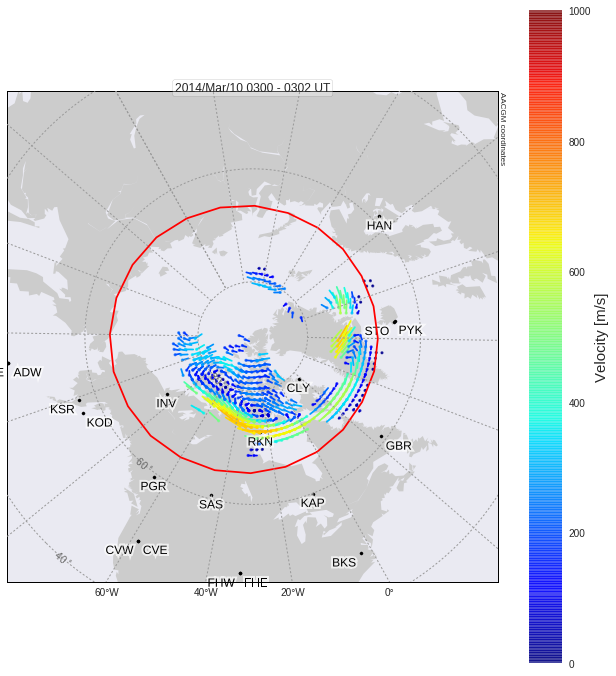

In [5]:
fig = plt.figure(figsize=(11,12))
ax = fig.add_subplot(111)

mObj = plotUtils.mapObj(boundinglat=45.,gridLabels=True, coords='mag')

xEqu,yEqu = mObj(poesDF["MLON"].values, poesDF["MLAT"].values)
bpltpoes = mObj.plot( xEqu,yEqu, zorder = 7., color = 'r' )
mapDatObj = davitpy.pydarn.plotting.plotMapGrd.MapConv(selDT, mObj, ax)
mapDatObj.overlayMapFitVel()